# EXPLORE MODULES

In [1]:
import tellurium as te
import numpy as np
import pandas as pd

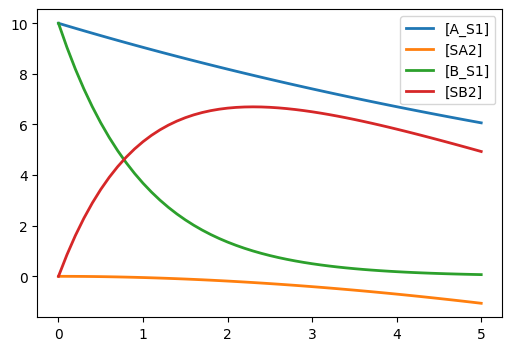

In [27]:
model = """


model modelA()
species S1, S2
S1 -> S2; k1*S1
S2 -> ; k2*k2

k1 = 0.1
k2 = 1
S1 = 10
S2 = 0
end

model modelB()
species S1, S2
S1 -> S2; k1*S1
S2 -> ; k2*k2

k1 = 1
k2 = 1
S1 = 10
S2 = 0
end

model *main()
A: modelA();
B: modelB();
species SA2, SB2
SA2 is A.S2
SB2 is B.S2
a := SA2 + SB2

end
"""
rr = te.loada(model)
rr.simulate()
rr.plot()

# Append Models

In [24]:
class Container(object):
    def __init__(self, name):
        self.name = name
        self.k1 = None
        self.k2 = None
        self.k3 = None
        self.k4 = None

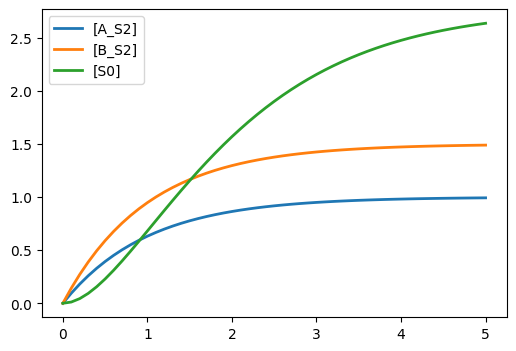

In [55]:
model = """

model modelA()
species S1, S2
S1 -> S2; k1*S1
S2 -> ; k2*k2

k1 = 0.4
k2 = 1
S1 = 10
S2 = 0
end

model modelB()
species S1, S2
S1 -> S2; k1*S1
S2 -> ; k2*k2

k1 = 0.5
k2 = 1
S1 = 10
S2 = 0
end

model *main()
A: modelA();
B: modelB();

A.S1 is $S1
B.S1 is $S1

S1 = 5
A.S2->S0; k1*A.S2
B.S2->S0; k2*B.S2
S0 ->; k3*S0
k1 = 1
k2 = 1
k3 = 0.9
end
"""
a = Container("A")
b = Container("B")
a.k1 = 0.9
# a.k2 = 1
# b.k1 = 1
# b.k2 = 2
rr = te.loada(model)
if False:
    for obj in [a, b]:
        for property in dir(obj):
            if not "__" in property:
                name = "%s_%s" % (obj.name, property)
                value = getattr(obj, property)
                if value is None:
                    break
                import pdb; pdb.set_trace()
                rr[name] = getattr(obj, property)
rr.simulate()
rr.plot()

In [13]:
getattr(a, "k1")

0.4